In [1]:
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np
import pandas as pd
import cv2

#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [2]:
# wczytanie zdjęcia
img = cv2.imread("/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple A/Apple 1.png")



<Figure size 1440x1440 with 0 Axes>

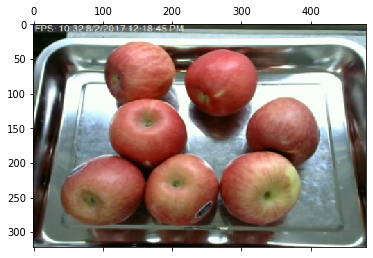

In [3]:
# Display the resulting frame
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
# plt.gray()
plt.matshow(img)
plt.show()

In [4]:
import glob

In [5]:
apple_a= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple A/*.png')

In [6]:
#apple_b= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple B/*.png')

In [7]:
#apple_c= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple C/*.png')

In [8]:
#apple_d= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple D/*.png')

In [9]:
apple_e= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Banana/*.png')

In [10]:
#apple_f= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple F/*.png')

In [11]:
#applesAll= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Total Number of Apples/*.png')

In [12]:
# n_applesAll = len(apples)
# n_applesAll

In [13]:
apples = apple_a+apple_e[:500]
n_apples = len(apples)
n_apples

1192

In [14]:
img_height, img_width = 150, 150

In [15]:
apples_array = np.empty((n_apples, img_height, img_width, 3))
apples_list = []

In [16]:
for i, path in enumerate(apples):
    image = cv2.imread(path)
    if image.shape[:-1] != (img_height, img_width):
        image = cv2.resize(image, (img_width, img_height))
        
    apples_array[i] = image

In [17]:
for i, path in enumerate(apples):
    image = cv2.imread(path)
    if image.shape[:-1] != (img_height, img_width):
        image = cv2.resize(image, (img_width, img_height))
    apples_list.append(image)

In [18]:
len(apples_list)

1192

In [19]:
apples_array_bis = np.stack(apples_list)

In [20]:
apples_array_bis.shape

(1192, 150, 150, 3)

In [21]:
# przypisanie apple_array do x 
x = apples_array

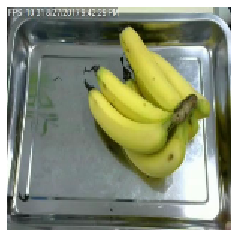

In [22]:
img = cv2.cvtColor(apples_array_bis[1000], cv2.COLOR_BGR2RGB)
plt.matshow(img)
plt.axis('off')
plt.show()

In [23]:
applesPaths = [apple_a, apple_e[:500]]

In [24]:
# wyrzucamy, bo nie wiemy jaki jest cel tego 
# x = np.zeros((1356, 150, 150, 3)) 
y = np.zeros(1192,)

In [25]:
idx = 0
for i in range(len(applesPaths)):
    appleClass = i
    for path in applesPaths[i]:
        # wczytywanie
        # x mamy już gotowy wyżej, dlatego wyrzucone
        #x[idx] = n_apples
        y[idx] = int(appleClass)
        idx += 1

In [26]:
print(x.shape)
#y = y.reshape(-1,1)
#y.shape

(1192, 150, 150, 3)


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42, stratify=y)

In [28]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train.shape

(894, 150, 150, 3)

In [29]:
from tensorflow.keras.utils import to_categorical

# transformujemy y_test
y_test_onehot = to_categorical(y_test)
# podglądamy
# y_test_onehot = y_test.astype(np.float32)

# transformujemy y_train
y_train_onehot = to_categorical(y_train)
# podglądamy
# y_train_onehot = y_train.astype(np.float32)

print("y_test.shape: ", y_test_onehot.shape)
print("y_train.shape: ", y_train_onehot.shape)

y_test.shape:  (298, 2)
y_train.shape:  (894, 2)


In [30]:
#y_test = pd.DataFrame(y_test[0])
#y_train = pd.DataFrame(y_train[0])
#print(y_test)

In [31]:
#y_train

In [32]:
#y_train = y_train.toarray()
#y_train

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  0


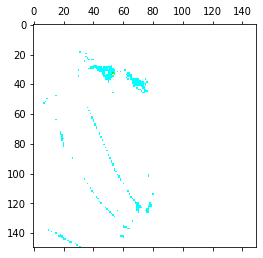

In [33]:
# podgląd x - zdjęcia
n = 569
plt.matshow(x_train[n])
print("Label: ", np.argmax(y_train[n]))

In [34]:
print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)
print('y_train shape', y_train_onehot.shape)
print('y_test shape', y_test_onehot.shape)

x_train shape (894, 150, 150, 3)
x_test shape (298, 150, 150, 3)
y_train shape (894, 2)
y_test shape (298, 2)


In [35]:
# x_train

In [36]:
unique, counts = np.unique(y, return_counts=True)
klasy = dict(zip(unique, counts))
print('Klasa 0: {0}\nKlasa 1: {1}'.format(klasy[0],klasy[1]))

Klasa 0: 692
Klasa 1: 500


In [37]:
# unique, counts = np.unique(x, return_counts=True)
# dict(zip(unique, counts))

In [38]:
# normalizacja danych
x_train = x_train/255.0
x_test = x_test/255.0

In [39]:
# kontener na model
model = tf.keras.models.Sequential()
# pierwsza warstwa zmienia kształ na odpowiadający pod konwolucje, czyli 4D, posiada również rozmiar wejścia
model.add(tf.keras.layers.Input(shape=(150, 150, 3)))
# pierwsza ukryta, konwolucyjna
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=[3,3], padding="same"))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPool2D())
# druga ukryta, konwolucyjna
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=[3,3], padding="same"))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPool2D())
# trzecia ukryta, konwolucyjna
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=[3,3], padding="same"))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPool2D())
# spłaszczamy pod warstwy fully connected(Dense)
model.add(tf.keras.layers.Flatten())
# czwarta ukryta fully connetced
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.3))
# wyjściowa, zadaniem jest klasyfikacja 2 klas
model.add(tf.keras.layers.Dense(2))
# aktywacja jako softmax, aby uzyskać rozkład prawdopodbieństwa
model.add(tf.keras.layers.Softmax())
# żadnego dropout'u, nie chcemy abym nam wyzerowało wartość

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 256)     7168      
_________________________________________________________________
activation (Activation)      (None, 150, 150, 256)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 128)       295040    
_________________________________________________________________
activation_1 (Activation)    (None, 75, 75, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        7

In [41]:
# wybieramy optimalizator, polecam pobawić się z różnymi typami oraz różnymi wartościami learning rate'u
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# kompilujemy
model.compile(optimizer=opt, 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=["accuracy"])

In [42]:
# trenujemy, warto sprawdzić z różną wielkością batcha i epok
model.fit(x_train, y_train_onehot, epochs=5, verbose=1)
print("done")

Train on 894 samples
Epoch 1/5
894/894 [==============================] - 9s 10ms/sample - loss: 0.7560 - accuracy: 0.6286
Epoch 2/5
894/894 [==============================] - 5s 5ms/sample - loss: 0.2527 - accuracy: 0.9027
Epoch 3/5
894/894 [==============================] - 5s 5ms/sample - loss: 0.0551 - accuracy: 0.9821
Epoch 4/5
894/894 [==============================] - 5s 5ms/sample - loss: 0.0141 - accuracy: 0.9978
Epoch 5/5
894/894 [==============================] - 5s 5ms/sample - loss: 0.0073 - accuracy: 0.9966
done


In [43]:
# testowanie
coef = model.evaluate(x_test, y_test_onehot)

298/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [44]:
print('loss: {0}:\naccuracy: {1}'.format(coef[0], coef[1]))

loss: 0.0018030076819759537:
accuracy: 1.0


In [45]:
y_pred = tf.nn.softmax(model.predict(x_test)).numpy()
print(classification_report(y_test_onehot.argmax(axis=1), y_pred.argmax(axis=1))) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       125

    accuracy                           1.00       298
   macro avg       1.00      1.00      1.00       298
weighted avg       1.00      1.00      1.00       298



In [46]:
confusion_matrix(y_test_onehot.argmax(axis=1), y_pred.argmax(axis=1))

array([[173,   0],
       [  0, 125]])